In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df_d2_CA=pd.read_csv('../raw_data/df_raw_d2.csv')

In [3]:
df_d2= pd.read_csv('../raw_data/export_d2.csv')
df_d16 = pd.read_csv('../raw_data/export_d16.csv')

In [4]:
df_d2.head()

,Restaurant,Jour,Service,Nombre de Réservations,Nombre de couverts réservation,Nombre de Passages,Nombre de couverts passage,Nombre de couverts total,Délai en jour entre la prise de résa et le jour de résa
0,DAROCO BOURSE,2022-02-12,Diner -,1,2,0,0,2,172.0
1,DAROCO BOURSE,2021-11-08,Diner -,1,3,0,0,3,71.0
2,DAROCO BOURSE,2021-11-06,Diner -,1,2,0,0,2,89.0
3,DAROCO BOURSE,2021-11-05,Déjeuner,2,4,0,0,4,96.5
4,DAROCO BOURSE,2021-10-23,Diner -,1,3,0,0,3,54.0


In [5]:
df_d16.head()

,Restaurant,Jour,Service,Nombre de Réservations,Nombre de couverts réservation,Nombre de Passages,Nombre de couverts passage,Nombre de couverts total,Délai en jour entre la prise de résa et le jour de résa
0,Daroco 16,2021-10-23,Dîner -,1,2,0,0,2,53.0
1,Daroco 16,2021-10-16,Dîner -,1,2,0,0,2,48.0
2,Daroco 16,2021-10-15,Dîner -,1,4,0,0,4,45.0
3,Daroco 16,2021-10-05,NaN,1,5,0,0,5,64.0
4,Daroco 16,2021-09-24,Dîner -,1,2,0,0,2,50.0


## Prepross & Cleaning 

In [6]:
df_d2 = df_d2.drop(columns='Restaurant')

In [7]:
df_d16 = df_d16.drop(columns='Restaurant')

In [8]:
df_d2['Jour'] = pd.to_datetime(df_d2['Jour'],  format='%Y-%m-%d')

In [9]:
df_d16['Jour'] = pd.to_datetime(df_d16['Jour'],  format='%Y-%m-%d')

In [10]:
df_d2.loc[df_d2['Jour']=='2021-07-31'].index[0]

106

In [11]:
df_d2.loc[df_d2['Jour']=='2019-01-01'].index[0] + 1

1566

In [12]:
df_d2 = df_d2[df_d2.loc[df_d2['Jour']=='2021-07-31'].index[0] : df_d2.loc[df_d2['Jour']=='2019-01-01'].index[0] + 1]

In [13]:
df_d2 = df_d2.sort_values(by='Jour').reset_index(drop=True)

In [14]:
df_d2 = df_d2.rename(columns={"Jour": "date", "Service": "service", 'Nombre de Réservations': 'nb_resa', 'Nb. couverts réservations': 'nb_couverts_resa', 'Nb. de Passage': 'nb_passage', 'Nb. couverts passage': 'nb_couverts_passage',\
                     'Nombre de couverts total':'total_couverts', 'Délai en jour entre la prise de résa et le jour de résa':'temps_resa'})



In [15]:
df_d2

,date,service,nb_resa,Nombre de couverts réservation,Nombre de Passages,Nombre de couverts passage,total_couverts,temps_resa
0,2019-01-01,Diner -,72,196,20,52,248,2.8043
1,2019-01-02,Déjeuner,20,65,15,40,105,0.0857
2,2019-01-02,Diner -,72,203,18,35,238,1.2444
3,2019-01-03,Déjeuner,22,65,35,84,149,0.0351
4,2019-01-03,Diner -,70,211,10,27,238,2.9625
...,...,...,...,...,...,...,...,...
1455,2021-07-29,Diner -,43,134,9,20,154,1.6154
1456,2021-07-30,Déjeuner,18,50,8,22,72,1.4615
1457,2021-07-30,Diner -,57,156,5,11,167,1.5806
1458,2021-07-31,Dejeuner,6,17,3,8,25,0.2222


In [16]:
df_d16.loc[df_d16['Jour']=='2021-07-31'].index[0]

53

In [17]:
df_d2

,date,service,nb_resa,Nombre de couverts réservation,Nombre de Passages,Nombre de couverts passage,total_couverts,temps_resa
0,2019-01-01,Diner -,72,196,20,52,248,2.8043
1,2019-01-02,Déjeuner,20,65,15,40,105,0.0857
2,2019-01-02,Diner -,72,203,18,35,238,1.2444
3,2019-01-03,Déjeuner,22,65,35,84,149,0.0351
4,2019-01-03,Diner -,70,211,10,27,238,2.9625
...,...,...,...,...,...,...,...,...
1455,2021-07-29,Diner -,43,134,9,20,154,1.6154
1456,2021-07-30,Déjeuner,18,50,8,22,72,1.4615
1457,2021-07-30,Diner -,57,156,5,11,167,1.5806
1458,2021-07-31,Dejeuner,6,17,3,8,25,0.2222


In [18]:
df_d2

,date,service,nb_resa,Nombre de couverts réservation,Nombre de Passages,Nombre de couverts passage,total_couverts,temps_resa
0,2019-01-01,Diner -,72,196,20,52,248,2.8043
1,2019-01-02,Déjeuner,20,65,15,40,105,0.0857
2,2019-01-02,Diner -,72,203,18,35,238,1.2444
3,2019-01-03,Déjeuner,22,65,35,84,149,0.0351
4,2019-01-03,Diner -,70,211,10,27,238,2.9625
...,...,...,...,...,...,...,...,...
1455,2021-07-29,Diner -,43,134,9,20,154,1.6154
1456,2021-07-30,Déjeuner,18,50,8,22,72,1.4615
1457,2021-07-30,Diner -,57,156,5,11,167,1.5806
1458,2021-07-31,Dejeuner,6,17,3,8,25,0.2222


In [19]:
df_d2

,date,service,nb_resa,Nombre de couverts réservation,Nombre de Passages,Nombre de couverts passage,total_couverts,temps_resa
0,2019-01-01,Diner -,72,196,20,52,248,2.8043
1,2019-01-02,Déjeuner,20,65,15,40,105,0.0857
2,2019-01-02,Diner -,72,203,18,35,238,1.2444
3,2019-01-03,Déjeuner,22,65,35,84,149,0.0351
4,2019-01-03,Diner -,70,211,10,27,238,2.9625
...,...,...,...,...,...,...,...,...
1455,2021-07-29,Diner -,43,134,9,20,154,1.6154
1456,2021-07-30,Déjeuner,18,50,8,22,72,1.4615
1457,2021-07-30,Diner -,57,156,5,11,167,1.5806
1458,2021-07-31,Dejeuner,6,17,3,8,25,0.2222


In [20]:
df_d16.loc[df_d16['Jour']=='2019-09-01'].index[0] + 1

631

In [21]:
df_d16 = df_d16[df_d16.loc[df_d16['Jour']=='2021-07-31'].index[0] : df_d16.loc[df_d16['Jour']=='2019-09-01'].index[0] + 1]

In [22]:
df_d16 = df_d16.sort_values(by='Jour').reset_index(drop=True)

In [23]:
df_d16 = df_d16.rename(columns={"Jour": "date", "Service": "service", 'Nombre de Réservations': 'nb_resa', 'Nb. couverts réservations': 'nb_couverts_resa', 'Nb. de Passage': 'nb_passage', 'Nb. couverts passage': 'nb_couverts_passage',\
                     'Nombre de couverts total':'total_couverts', 'Délai en jour entre la prise de résa et le jour de résa':'temps_resa'})



In [24]:
df_d16['jour_de_sem'] = df_d16['date'].dt.weekday +1

In [25]:
df_d2['jour_de_sem'] = df_d2['date'].dt.weekday +1

In [26]:
for i in range(len(df_d2)):
    if df_d2['service'][i]=='Diner - ':
        df_d2['service'][i] = 'soir'
    elif df_d2['service'][i]=='Diner - 2ème service':
        df_d2['service'][i] = 'soir'
    elif df_d2['service'][i]=='Diner jo':
        df_d2['service'][i] = 'soir'
    elif df_d2['service'][i]=='Déjeuner':
        df_d2['service'][i] = 'midi'
    elif df_d2['service'][i]=='Dejeuner':
        df_d2['service'][i] = 'midi'
    elif df_d2['service'][i]=='Dejeuner week-end':
        df_d2['service'][i] = 'midi'
        

/var/folders/d8/q33dfdgd07x2w3h7hz0ly4y00000gn/T/ipykernel_12092/2357607464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d2['service'][i] = 'soir'
/var/folders/d8/q33dfdgd07x2w3h7hz0ly4y00000gn/T/ipykernel_12092/2357607464.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d2['service'][i] = 'midi'
/var/folders/d8/q33dfdgd07x2w3h7hz0ly4y00000gn/T/ipykernel_12092/2357607464.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [27]:
df_d2['service'].unique()

array(['soir', 'midi', nan], dtype=object)

In [28]:
df_d2.isnull().sum()

date                                0
service                           161
nb_resa                             0
Nombre de couverts réservation      0
Nombre de Passages                  0
Nombre de couverts passage          0
total_couverts                      0
temps_resa                          0
jour_de_sem                         0
dtype: int64

In [29]:
df_d2.sort_values(by='service').tail(40)

,date,service,nb_resa,Nombre de couverts réservation,Nombre de Passages,Nombre de couverts passage,total_couverts,temps_resa,jour_de_sem
1226,2020-09-21,NaN,0,0,2,4,4,0.0000,1
1241,2020-09-28,NaN,1,2,0,0,2,2.0000,1
1252,2020-10-03,NaN,0,0,3,6,6,0.0000,6
1256,2020-10-04,NaN,1,2,0,0,2,1.0000,7
1260,2020-10-06,NaN,0,0,2,4,4,0.0000,2
1263,2020-10-07,NaN,0,0,1,2,2,0.0000,3
1269,2020-10-09,NaN,0,0,1,3,3,0.0000,5
1273,2020-10-11,NaN,42,108,20,47,155,0.5645,7
1275,2020-10-12,NaN,0,0,22,46,46,0.0000,1
1279,2020-10-13,NaN,0,0,13,33,33,0.0000,2


In [30]:
df_d2.loc[df_d2['date']=='2020-10-11']

,date,service,nb_resa,Nombre de couverts réservation,Nombre de Passages,Nombre de couverts passage,total_couverts,temps_resa,jour_de_sem
1273,2020-10-11,NaN,42,108,20,47,155,0.5645,7
1274,2020-10-11,midi,22,65,17,41,106,0.4615,7


In [31]:
df_d2_CA

,date,jour,service,CA_TTC,CA_HT,TVA
0,2019-01-01,Mardi,soir,8345.0,7385.15,959.85
1,2019-01-02,Mercredi,midi,3939.0,3543.26,395.74
2,2019-01-02,Mercredi,soir,9045.5,7948.33,1097.17
3,2019-01-03,Jeudi,midi,4836.0,4311.97,524.03
4,2019-01-03,Jeudi,soir,10024.0,8819.17,1204.83
...,...,...,...,...,...,...
1229,2021-07-29,Jeudi,soir,7230.0,6371.44,858.56
1230,2021-07-30,Vendredi,midi,2104.0,1902.35,201.65
1231,2021-07-30,Vendredi,soir,9816.5,8634.09,1182.41
1232,2021-07-31,Samedi,midi,1202.5,1078.18,124.32


In [32]:
df_d2.shape

(1460, 9)

In [33]:
len(df_d2.loc[df_d2['total_couverts']<10])

166

In [34]:
df_d2=df_d2.drop(df_d2.loc[df_d2['total_couverts']<10].index)

In [35]:
df_d2.shape

(1294, 9)

In [36]:
df_d2.isnull().sum()

date                               0
service                           34
nb_resa                            0
Nombre de couverts réservation     0
Nombre de Passages                 0
Nombre de couverts passage         0
total_couverts                     0
temps_resa                         0
jour_de_sem                        0
dtype: int64

In [44]:
df_d2.sort_values(by=['service','total_couverts']).tail(40)

,date,service,nb_resa,Nombre de couverts réservation,Nombre de Passages,Nombre de couverts passage,total_couverts,temps_resa,jour_de_sem
606,2019-10-05,soir,80,273,29,70,343,3.5321,6
637,2019-10-19,soir,86,284,17,59,343,4.6019,6
295,2019-05-18,soir,88,289,25,55,344,3.4071,6
279,2019-05-11,soir,87,278,26,68,346,3.2389,6
206,2019-04-06,soir,89,295,21,52,347,2.7091,6
652,2019-10-26,soir,79,258,36,96,354,2.8609,6
466,2019-08-05,NaN,0,0,1,10,10,0.0000,1
639,2019-10-20,NaN,0,0,4,10,10,0.0000,7
691,2019-11-12,NaN,0,0,5,10,10,0.0000,2
825,2020-01-07,NaN,0,0,5,10,10,0.0000,2


In [94]:
df_service_has_NAN=df_d2.loc[df_d2.isnull().any(axis=1)]
df_service_has_NAN.sort_values(by='total_couverts',ascending=False)

,date,service,nb_resa,Nombre de couverts réservation,Nombre de Passages,Nombre de couverts passage,total_couverts,temps_resa,jour_de_sem
1273,2020-10-11,NaN,42,108,20,47,155,0.5645,7
1323,2020-10-31,NaN,14,68,0,0,68,7.0714,6
175,2019-03-24,NaN,0,0,20,53,53,0.0000,7
1275,2020-10-12,NaN,0,0,22,46,46,0.0000,1
806,2019-12-31,NaN,1,3,14,41,44,0.0000,2
701,2019-11-15,NaN,0,0,16,35,35,0.0000,5
1279,2020-10-13,NaN,0,0,13,33,33,0.0000,2
23,2019-01-13,NaN,0,0,6,32,32,0.0000,7
696,2019-11-14,NaN,0,0,14,29,29,0.0000,4
1322,2020-10-30,NaN,9,28,0,0,28,8.7778,5


In [331]:
df_d2

,date,service,nb_resa,Nombre de couverts réservation,Nombre de Passages,Nombre de couverts passage,total_couverts,temps_resa,jour_de_sem
0,2019-01-01,soir,72,196,20,52,248,2.8043,2
1,2019-01-02,midi,20,65,15,40,105,0.0857,3
2,2019-01-02,soir,72,203,18,35,238,1.2444,3
3,2019-01-03,midi,22,65,35,84,149,0.0351,4
4,2019-01-03,soir,70,211,10,27,238,2.9625,4
...,...,...,...,...,...,...,...,...,...
1455,2021-07-29,soir,43,134,9,20,154,1.6154,4
1456,2021-07-30,midi,18,50,8,22,72,1.4615,5
1457,2021-07-30,soir,57,156,5,11,167,1.5806,5
1458,2021-07-31,midi,6,17,3,8,25,0.2222,6


In [85]:
test = df_d2.sort_values(by=['service','total_couverts'])[:1260]

In [59]:
test['service'].unique()

array(['midi', 'soir'], dtype=object)

In [63]:
df_d2_CA['date'] = pd.to_datetime(df_d2_CA['date'],  format='%Y-%m-%d')

In [65]:
merged = test.merge(df_d2_CA, how='left', left_on=['date','service'],right_on=['date','service'])

In [335]:
exporting_csv = df_d2.merge(df_d2_CA, how='left', left_on=['date','service'],right_on=['date','service'])

In [337]:
exporting_csv.to_csv('/Users/guillaume/Desktop/Projet_Daroco/df_d2_COUV&CA_merged.csv', index=False)

In [336]:
exporting_csv.loc[exporting_csv.isnull().any(axis=1)]

,date,service,nb_resa,Nombre de couverts réservation,Nombre de Passages,Nombre de couverts passage,total_couverts,temps_resa,jour_de_sem,jour,CA_TTC,CA_HT,TVA
23,2019-01-13,NaN,0,0,6,32,32,0.0000,7,NaN,NaN,NaN,NaN
39,2019-01-20,NaN,0,0,5,13,13,0.0000,7,NaN,NaN,NaN,NaN
67,2019-02-03,NaN,0,0,7,14,14,0.0000,7,NaN,NaN,NaN,NaN
84,2019-02-10,NaN,0,0,4,16,16,0.0000,7,NaN,NaN,NaN,NaN
161,2019-03-21,NaN,0,0,5,14,14,0.0000,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,2021-06-27,soir,36,111,10,21,132,2.8478,7,NaN,NaN,NaN,NaN
1226,2021-06-27,midi,28,82,9,21,103,2.6757,7,NaN,NaN,NaN,NaN
1237,2021-07-03,soir,7,26,0,0,26,2.8571,6,NaN,NaN,NaN,NaN
1248,2021-07-09,midi,24,60,7,15,75,1.5161,5,NaN,NaN,NaN,NaN


In [66]:
merged['couverts_moy']=merged['CA_TTC']/merged['total_couverts']

In [76]:
merged = merged.sort_values(by='couverts_moy')[:1232]

In [95]:
merged.shape

(1232, 14)

In [112]:
merged_2 = df_d2.merge(df_d2_CA, how='inner', left_on=['date','service'],right_on=['date','service'])

In [113]:
merged_2.shape

(1232, 13)

In [114]:
merged_2.loc[merged_2.isnull().any(axis=1)].head(40)

,date,service,nb_resa,Nombre de couverts réservation,Nombre de Passages,Nombre de couverts passage,total_couverts,temps_resa,jour_de_sem,jour,CA_TTC,CA_HT,TVA


In [115]:
import seaborn as sns


<AxesSubplot:xlabel='date', ylabel='CA_TTC'>

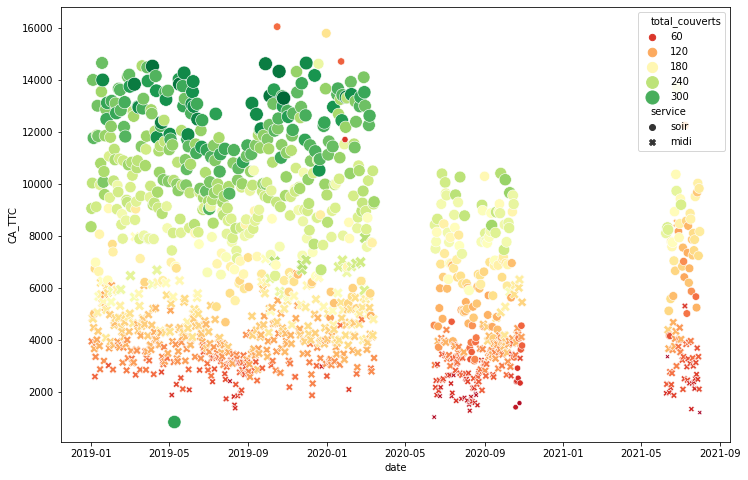

In [142]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=merged_2,x='date',y='CA_TTC',hue='total_couverts',
                size='total_couverts',style='service',sizes=(20, 200),palette='RdYlGn'
               )

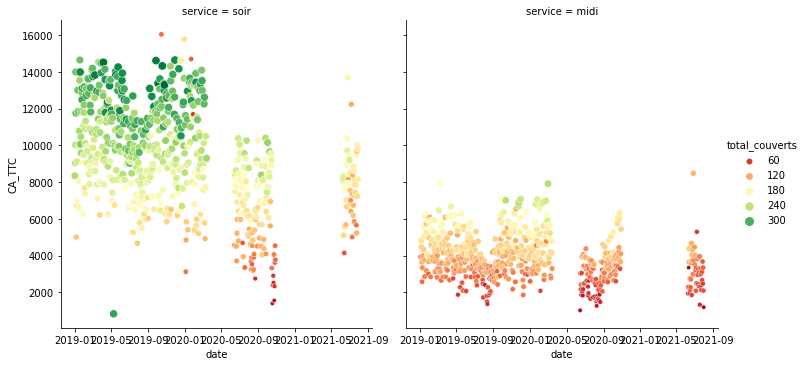

In [308]:
sns.relplot(
    data=merged_2, x="date", y="CA_TTC",
    col="service", hue="total_couverts",size='total_couverts',
    kind="scatter",palette='RdYlGn'
);

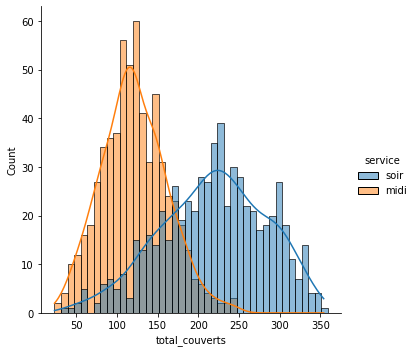

In [169]:
ax=sns.displot(data=merged_2, x="total_couverts",binwidth=8,hue='service',kde=True)

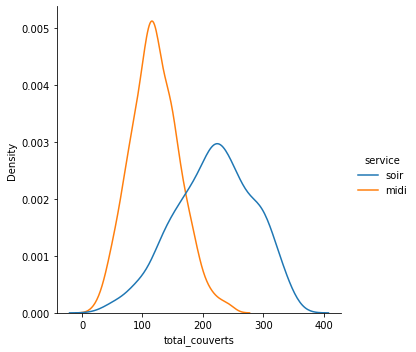

In [152]:
sns.displot(data=merged_2, x="total_couverts",hue='service',kind='kde')

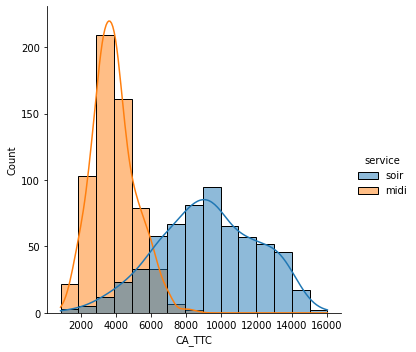

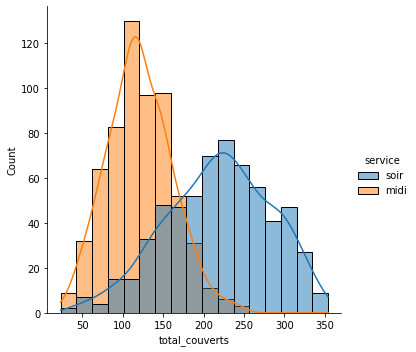

In [156]:
sns.displot(data=merged_2, x="CA_TTC",hue='service',kde=True)
sns.displot(data=merged_2, x="total_couverts",hue='service',kde=True)

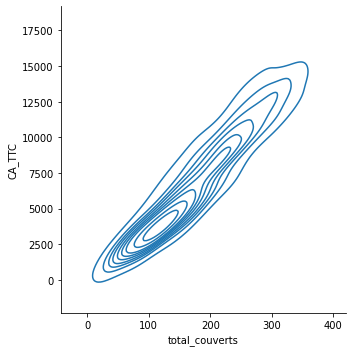

In [163]:
sns.displot(merged_2, x="total_couverts", y="CA_TTC", kind="kde")

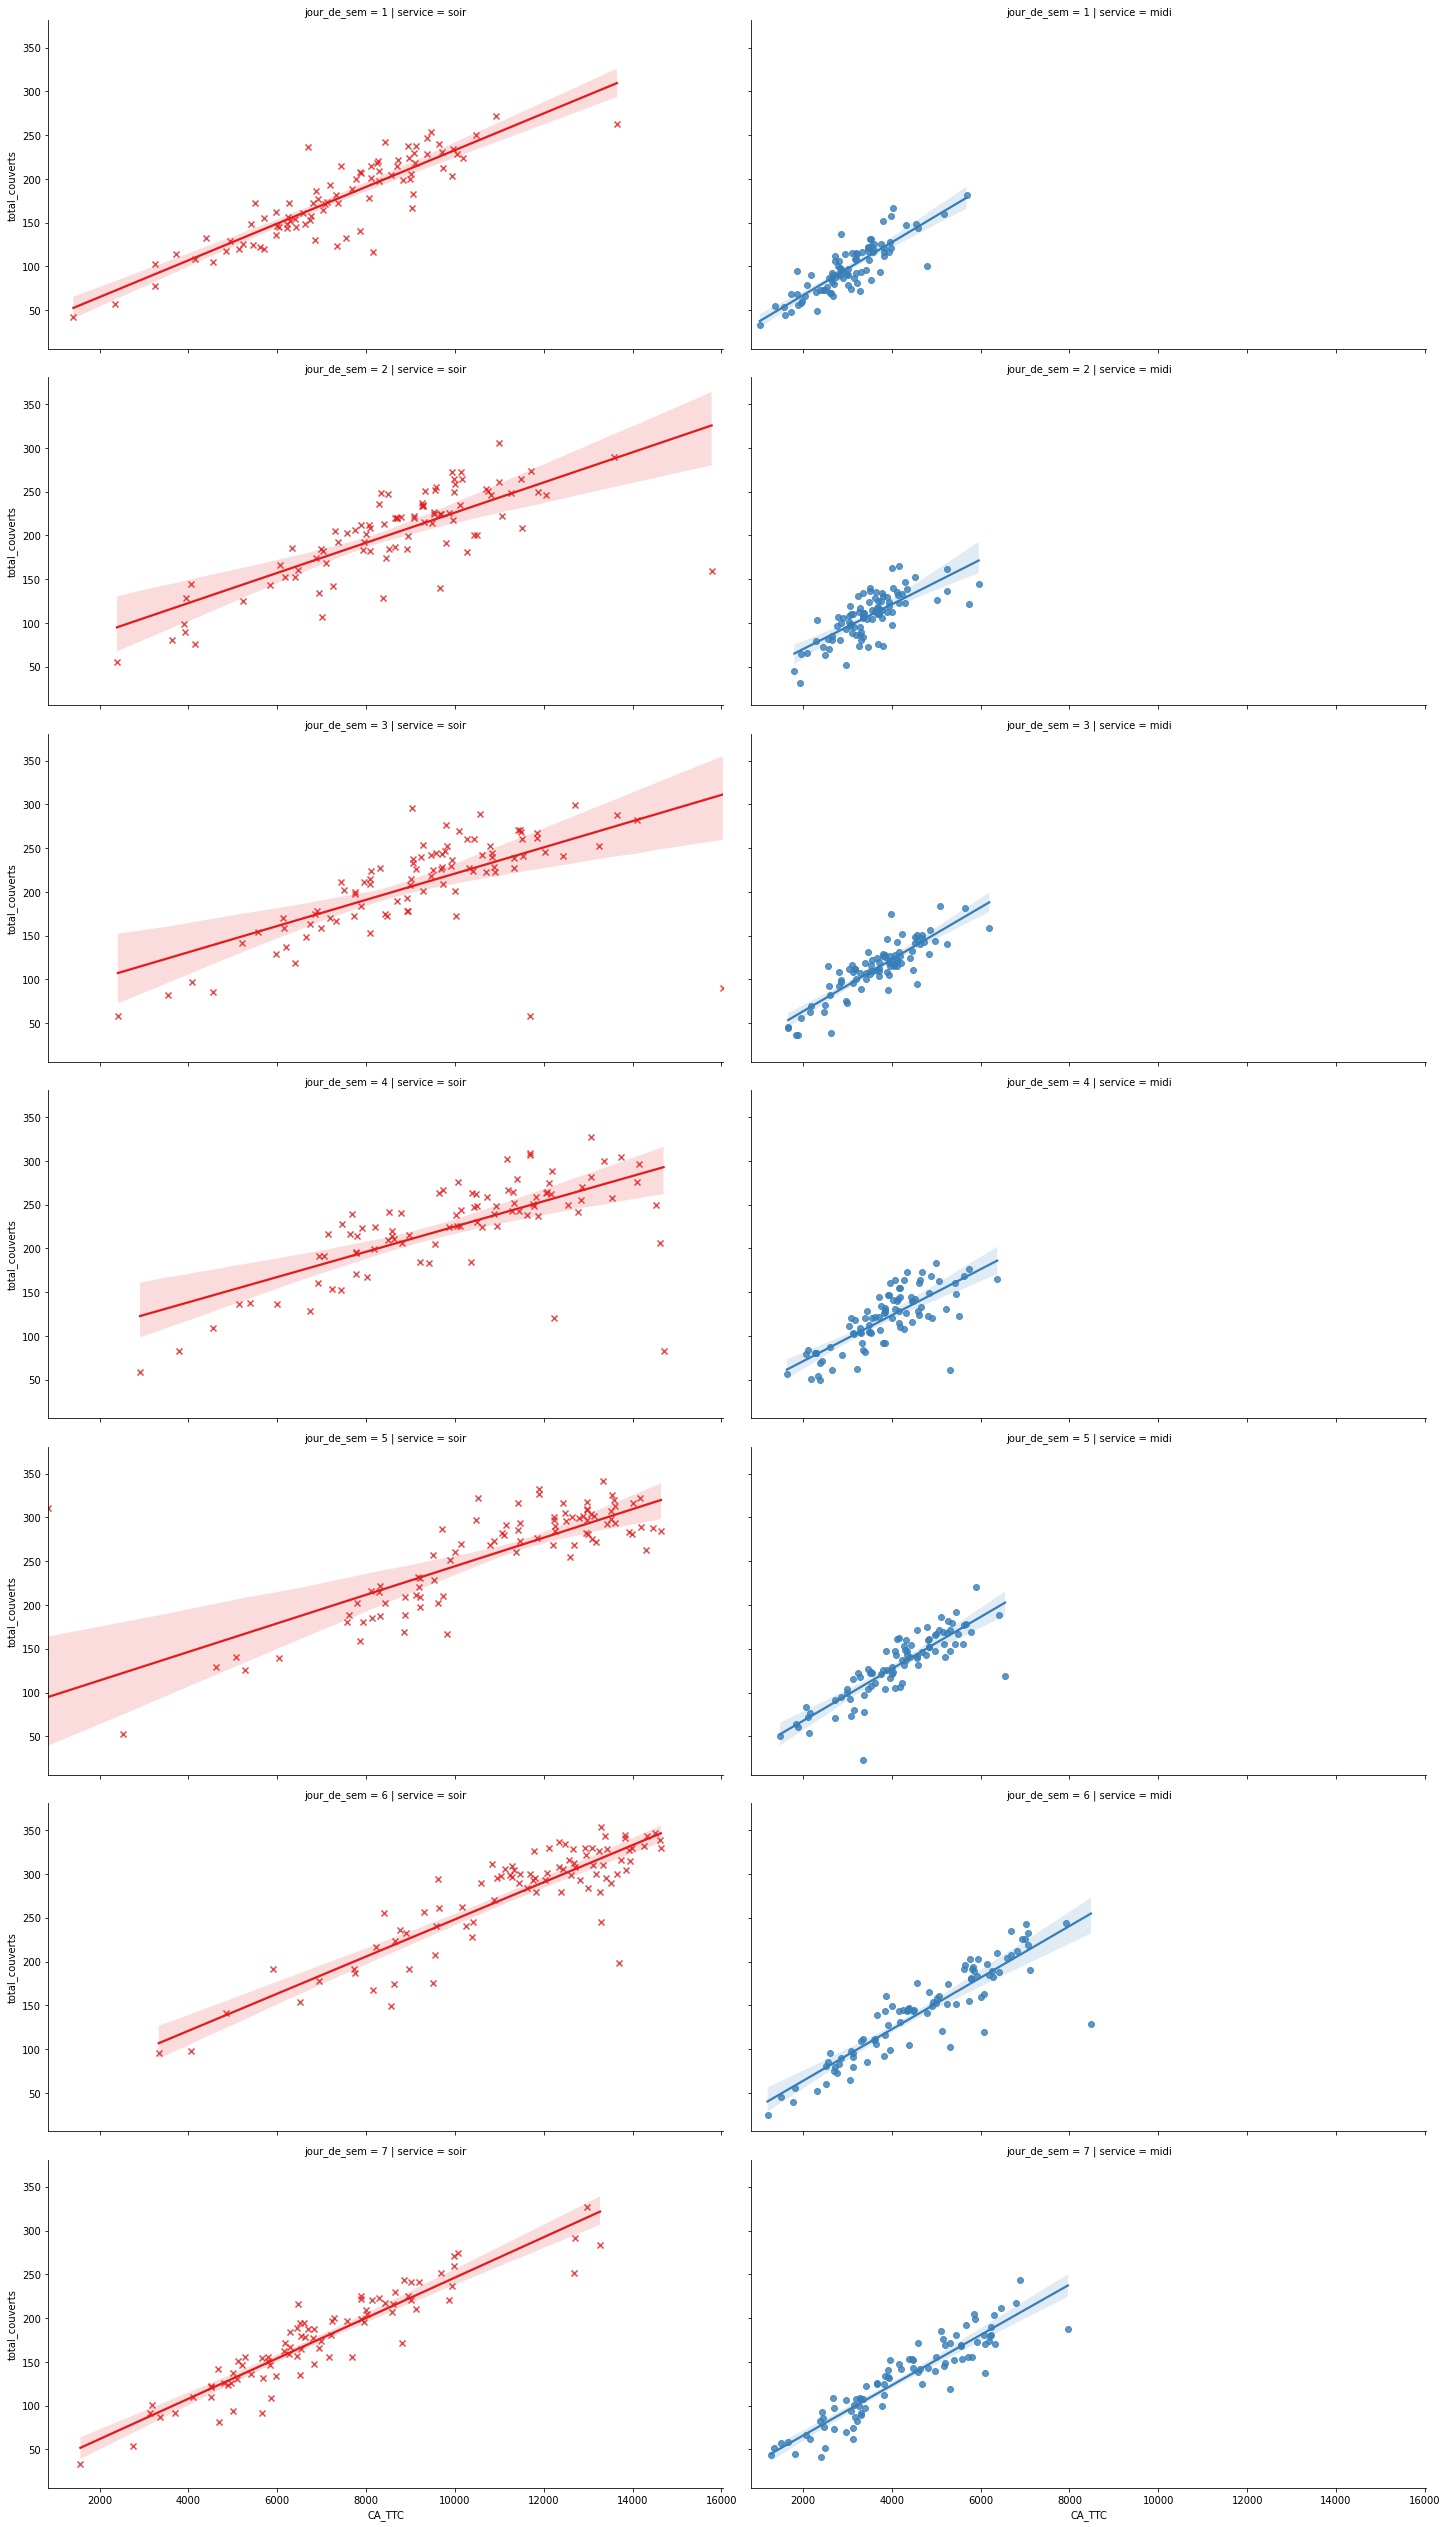

In [184]:
sns.lmplot(col='service',row='jour_de_sem',
           y="total_couverts", x="CA_TTC", 
           data=merged_2,
           hue='service',
           markers=["x", "o"],
           palette="Set1",
          aspect=2);

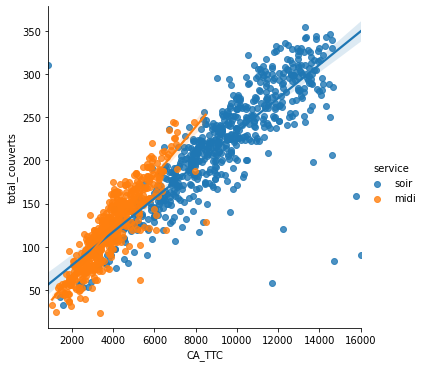

In [180]:
sns.lmplot(y="total_couverts", x="CA_TTC", data=merged_2,hue='service');

<AxesSubplot:>

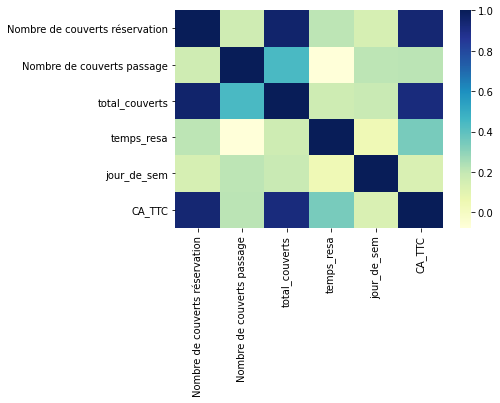

In [168]:
# Heatmap
corr = merged_2.drop(columns=['CA_HT','TVA','Nombre de Passages','nb_resa']).corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

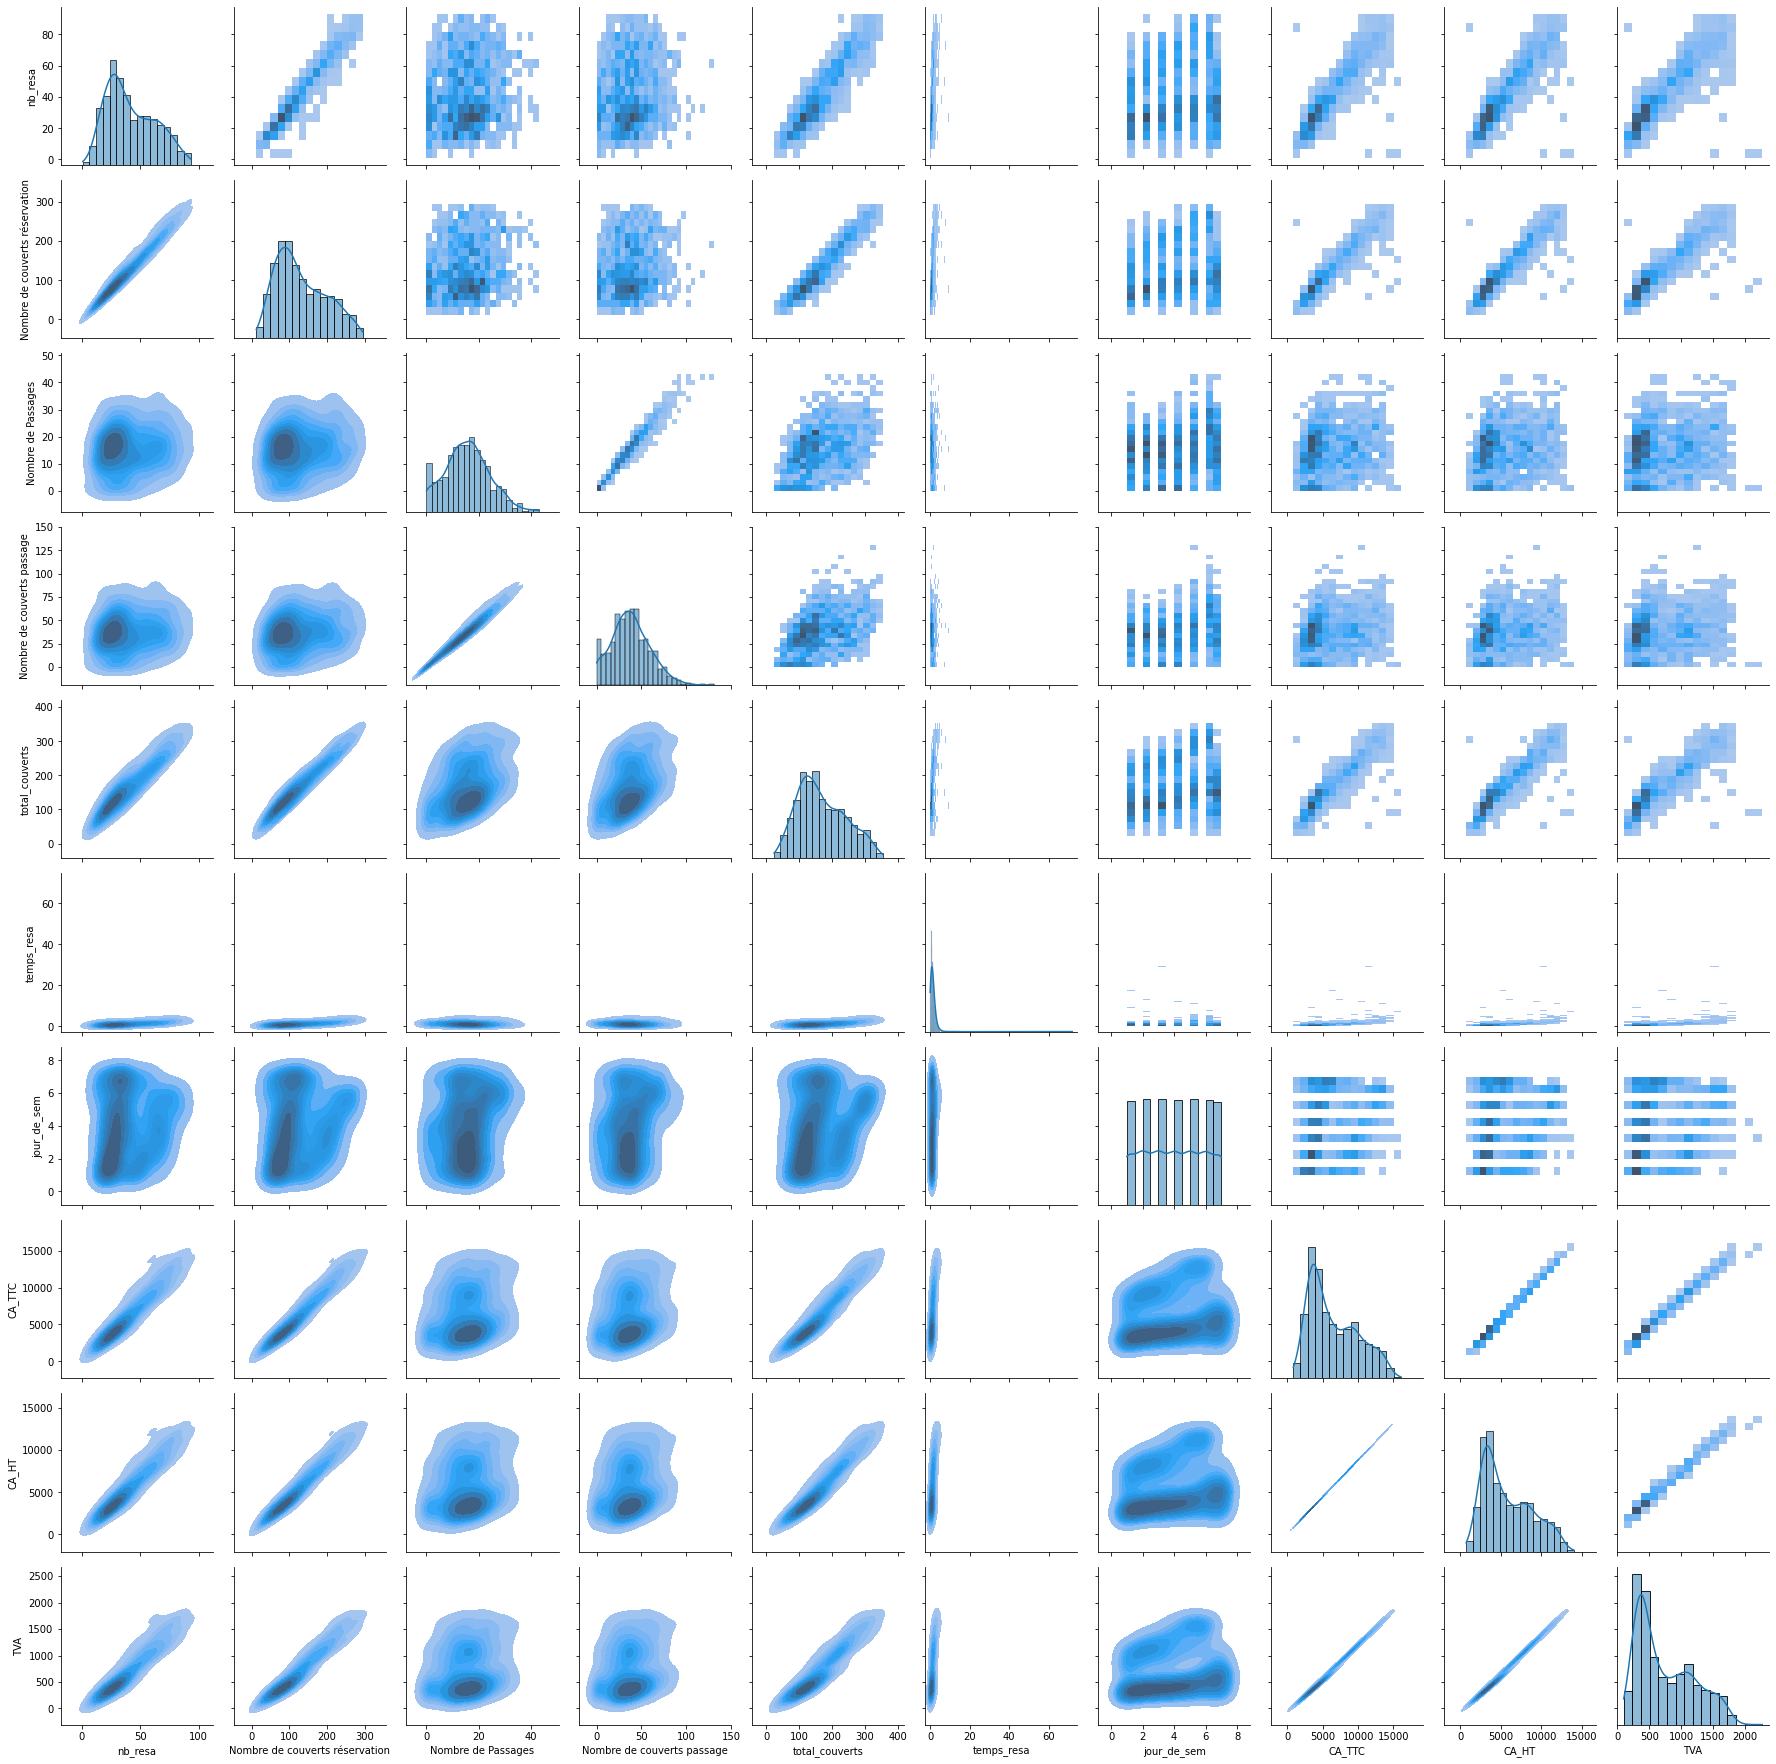

In [170]:
#g = sns.PairGrid(merged_2)
#g.map_upper(sns.histplot)
#g.map_lower(sns.kdeplot, fill=True)
#g.map_diag(sns.histplot, kde=True)

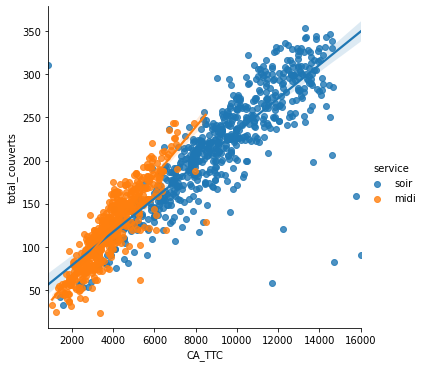

In [175]:
sns.lmplot(y="total_couverts", x="CA_TTC", data=merged_2,hue='service');

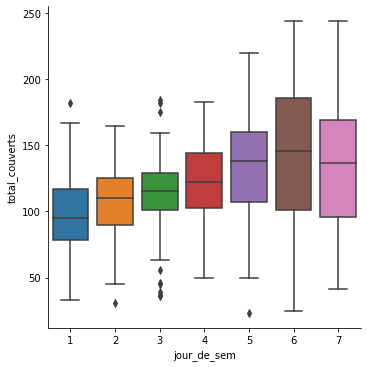

In [187]:
sns.catplot(x='jour_de_sem', y='total_couverts', data=merged_2.loc[merged_2['service']=='midi'], kind="box");

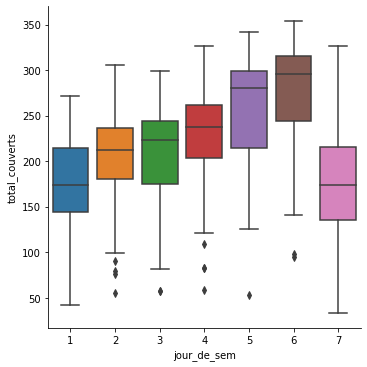

In [188]:
sns.catplot(x='jour_de_sem', y='total_couverts', data=merged_2.loc[merged_2['service']=='soir'], kind="box");

In [200]:
df_d2_preproc=pd.read_csv('../raw_data/preproc_data_d2.csv')

In [201]:
df_d2_preproc['date'] = pd.to_datetime(df_d2_CA['date'],  format='%Y-%m-%d')

In [202]:
ready = df_d2.merge(df_d2_preproc, how='inner', left_on=['date','service'],right_on=['date','service'])

In [203]:
ready

,date,service,nb_resa,Nombre de couverts réservation,Nombre de Passages,Nombre de couverts passage,total_couverts,temps_resa,jour_de_sem,jour,...,cos_jour_de_sem,sin_jour_de_sem,cos_jour_du_mois,sin_jour_du_mois,cos_mois_de_annee,sin_mois_de_annee,cos_jour_annee,sin_jour_annee,cos_semaine_annee,sin_semaine_annee
0,2019-01-01,soir,72,196,20,52,248,2.8043,2,Mardi,...,-0.222521,0.974928,0.979530,2.012985e-01,0.866025,0.5,0.999852,0.017213,0.992709,0.120537
1,2019-01-02,midi,20,65,15,40,105,0.0857,3,Mercredi,...,-0.900969,0.433884,0.918958,3.943559e-01,0.866025,0.5,0.999407,0.034422,0.992709,0.120537
2,2019-01-02,soir,72,203,18,35,238,1.2444,3,Mercredi,...,-0.900969,0.433884,0.918958,3.943559e-01,0.866025,0.5,0.999407,0.034422,0.992709,0.120537
3,2019-01-03,midi,22,65,35,84,149,0.0351,4,Jeudi,...,-0.900969,-0.433884,0.820763,5.712682e-01,0.866025,0.5,0.998667,0.051620,0.992709,0.120537
4,2019-01-03,soir,70,211,10,27,238,2.9625,4,Jeudi,...,-0.900969,-0.433884,0.820763,5.712682e-01,0.866025,0.5,0.998667,0.051620,0.992709,0.120537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2021-07-29,soir,43,134,9,20,154,1.6154,4,Jeudi,...,-0.900969,-0.433884,0.918958,-3.943559e-01,-0.866025,-0.5,-0.890028,-0.455907,-0.885456,-0.464723
1228,2021-07-30,midi,18,50,8,22,72,1.4615,5,Vendredi,...,-0.222521,-0.974928,0.979530,-2.012985e-01,-0.866025,-0.5,-0.882048,-0.471160,-0.885456,-0.464723
1229,2021-07-30,soir,57,156,5,11,167,1.5806,5,Vendredi,...,-0.222521,-0.974928,0.979530,-2.012985e-01,-0.866025,-0.5,-0.882048,-0.471160,-0.885456,-0.464723
1230,2021-07-31,midi,6,17,3,8,25,0.2222,6,Samedi,...,0.623490,-0.781831,1.000000,-2.449294e-16,-0.866025,-0.5,-0.873807,-0.486273,-0.885456,-0.464723


In [204]:
ready.columns

Index(['date', 'service', 'nb_resa', 'Nombre de couverts réservation',
       'Nombre de Passages', 'Nombre de couverts passage', 'total_couverts',
       'temps_resa', 'jour_de_sem', 'jour', 'CA_TTC', 'moyen_7_services',
       'moyen_31_services', 'moyenne_3der_j&service', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'wind_speed', 'clouds_all', 'clear', 'clouds',
       'drizzle', 'drizzle_and_rain', 'fog', 'mist', 'rain', 'thunderstorm',
       'match_edf', 'match_happening', 'match_happening_cl', 'roland_garros',
       'fashion_week', 'vacances_paris', 'cos_jour_de_sem', 'sin_jour_de_sem',
       'cos_jour_du_mois', 'sin_jour_du_mois', 'cos_mois_de_annee',
       'sin_mois_de_annee', 'cos_jour_annee', 'sin_jour_annee',
       'cos_semaine_annee', 'sin_semaine_annee'],
      dtype='object')

In [261]:
top=ready.drop(columns=['date','nb_resa', 'Nombre de couverts réservation',
       'Nombre de Passages', 'Nombre de couverts passage','jour_de_sem', 'jour'])

In [262]:
top

,service,total_couverts,temps_resa,CA_TTC,moyen_7_services,moyen_31_services,moyenne_3der_j&service,temp,feels_like,temp_min,...,cos_jour_de_sem,sin_jour_de_sem,cos_jour_du_mois,sin_jour_du_mois,cos_mois_de_annee,sin_mois_de_annee,cos_jour_annee,sin_jour_annee,cos_semaine_annee,sin_semaine_annee
0,soir,248,2.8043,8345.0,0.000000,0.000000,0.00,280.87,280.87,279.48,...,-0.222521,0.974928,0.979530,2.012985e-01,0.866025,0.5,0.999852,0.017213,0.992709,0.120537
1,midi,105,0.0857,3939.0,0.000000,0.000000,0.00,279.57,278.92,278.83,...,-0.900969,0.433884,0.918958,3.943559e-01,0.866025,0.5,0.999407,0.034422,0.992709,0.120537
2,soir,238,1.2444,9045.5,0.000000,0.000000,0.00,278.95,277.22,277.71,...,-0.900969,0.433884,0.918958,3.943559e-01,0.866025,0.5,0.999407,0.034422,0.992709,0.120537
3,midi,149,0.0351,4836.0,0.000000,0.000000,0.00,279.11,279.11,278.06,...,-0.900969,-0.433884,0.820763,5.712682e-01,0.866025,0.5,0.998667,0.051620,0.992709,0.120537
4,soir,238,2.9625,10024.0,0.000000,0.000000,0.00,278.57,278.57,277.38,...,-0.900969,-0.433884,0.820763,5.712682e-01,0.866025,0.5,0.998667,0.051620,0.992709,0.120537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,soir,154,1.6154,7230.0,7909.714286,8088.625806,8803.83,295.25,294.82,293.58,...,-0.900969,-0.433884,0.918958,-3.943559e-01,-0.866025,-0.5,-0.890028,-0.455907,-0.885456,-0.464723
1228,midi,72,1.4615,2104.0,2849.357143,3314.595484,3076.17,295.70,295.29,294.40,...,-0.222521,-0.974928,0.979530,-2.012985e-01,-0.866025,-0.5,-0.882048,-0.471160,-0.885456,-0.464723
1229,soir,167,1.5806,9816.5,7880.642857,8008.254839,8632.17,294.44,294.01,293.27,...,-0.222521,-0.974928,0.979530,-2.012985e-01,-0.866025,-0.5,-0.882048,-0.471160,-0.885456,-0.464723
1230,midi,25,0.2222,1202.5,2846.428571,3108.821290,3432.42,294.69,294.47,294.16,...,0.623490,-0.781831,1.000000,-2.449294e-16,-0.866025,-0.5,-0.873807,-0.486273,-0.885456,-0.464723


In [263]:
top.corr()

,total_couverts,temps_resa,CA_TTC,moyen_7_services,moyen_31_services,moyenne_3der_j&service,temp,feels_like,temp_min,temp_max,...,cos_jour_de_sem,sin_jour_de_sem,cos_jour_du_mois,sin_jour_du_mois,cos_mois_de_annee,sin_mois_de_annee,cos_jour_annee,sin_jour_annee,cos_semaine_annee,sin_semaine_annee
total_couverts,1.000000,0.170650,0.915917,0.777064,0.653713,0.739815,-0.292582,-0.292602,-0.304893,-0.301339,...,-0.027340,-0.279823,0.044208,0.009009,0.196321,0.237003,0.238765,0.193843,0.225854,0.205378
temps_resa,0.170650,1.000000,0.342824,0.268382,0.227098,0.244349,-0.106147,-0.100370,-0.110205,-0.109264,...,-0.028156,-0.092660,-0.004940,-0.058710,0.080609,0.051289,0.087551,0.039777,0.086389,0.047795
CA_TTC,0.915917,0.342824,1.000000,0.836409,0.702972,0.773742,-0.274689,-0.273506,-0.288249,-0.284138,...,-0.075779,-0.226060,0.033333,-0.019295,0.158089,0.204820,0.195271,0.171957,0.183347,0.183335
moyen_7_services,0.777064,0.268382,0.836409,1.000000,0.842798,0.795975,-0.251113,-0.253017,-0.267052,-0.260960,...,0.001115,-0.007058,0.032984,-0.003368,0.133253,0.211946,0.173625,0.192232,0.159073,0.202320
moyen_31_services,0.653713,0.227098,0.702972,0.842798,1.000000,0.906545,-0.070905,-0.067546,-0.085935,-0.082685,...,0.023912,-0.003917,-0.005739,0.019347,-0.021701,0.138225,0.017752,0.145058,0.005473,0.143794
moyenne_3der_j&service,0.739815,0.244349,0.773742,0.795975,0.906545,1.000000,-0.081940,-0.081113,-0.097993,-0.091002,...,-0.070537,-0.214869,0.002482,0.034827,0.005259,0.137954,0.041545,0.140421,0.030561,0.141327
temp,-0.292582,-0.106147,-0.274689,-0.251113,-0.070905,-0.081940,1.000000,0.996533,0.994691,0.997298,...,-0.010113,-0.022119,-0.041333,-0.101758,-0.751635,-0.519107,-0.837106,-0.332663,-0.816969,-0.394689
feels_like,-0.292602,-0.100370,-0.273506,-0.253017,-0.067546,-0.081113,0.996533,1.000000,0.991266,0.994026,...,-0.013586,-0.023529,-0.042301,-0.106012,-0.748883,-0.527117,-0.835770,-0.342515,-0.815041,-0.403759
temp_min,-0.304893,-0.110205,-0.288249,-0.267052,-0.085935,-0.097993,0.994691,0.991266,1.000000,0.988944,...,-0.010725,-0.020586,-0.042321,-0.098191,-0.746454,-0.519960,-0.831903,-0.335452,-0.811556,-0.396904
temp_max,-0.301339,-0.109264,-0.284138,-0.260960,-0.082685,-0.091002,0.997298,0.994026,0.988944,1.000000,...,-0.011200,-0.021469,-0.042932,-0.105626,-0.754018,-0.517862,-0.839627,-0.330091,-0.819725,-0.392322


In [265]:
X_d2=top.drop(columns=['total_couverts','CA_TTC'])
y_d2=top['CA_TTC']

In [266]:
X_d2.shape

(1232, 35)

In [216]:
from sklearn import set_config; set_config(display='diagram')
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std

In [267]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(X_d2[['service']])
X_d2['service'] = ohe.transform(X_d2[['service']])
X_d2

,service,temps_resa,moyen_7_services,moyen_31_services,moyenne_3der_j&service,temp,feels_like,temp_min,temp_max,wind_speed,...,cos_jour_de_sem,sin_jour_de_sem,cos_jour_du_mois,sin_jour_du_mois,cos_mois_de_annee,sin_mois_de_annee,cos_jour_annee,sin_jour_annee,cos_semaine_annee,sin_semaine_annee
0,0.0,2.8043,0.000000,0.000000,0.00,280.87,280.87,279.48,281.45,0.45,...,-0.222521,0.974928,0.979530,2.012985e-01,0.866025,0.5,0.999852,0.017213,0.992709,0.120537
1,1.0,0.0857,0.000000,0.000000,0.00,279.57,278.92,278.83,280.31,1.34,...,-0.900969,0.433884,0.918958,3.943559e-01,0.866025,0.5,0.999407,0.034422,0.992709,0.120537
2,0.0,1.2444,0.000000,0.000000,0.00,278.95,277.22,277.71,279.81,2.24,...,-0.900969,0.433884,0.918958,3.943559e-01,0.866025,0.5,0.999407,0.034422,0.992709,0.120537
3,1.0,0.0351,0.000000,0.000000,0.00,279.11,279.11,278.06,280.25,0.89,...,-0.900969,-0.433884,0.820763,5.712682e-01,0.866025,0.5,0.998667,0.051620,0.992709,0.120537
4,0.0,2.9625,0.000000,0.000000,0.00,278.57,278.57,277.38,279.69,0.45,...,-0.900969,-0.433884,0.820763,5.712682e-01,0.866025,0.5,0.998667,0.051620,0.992709,0.120537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,0.0,1.6154,7909.714286,8088.625806,8803.83,295.25,294.82,293.58,296.82,0.89,...,-0.900969,-0.433884,0.918958,-3.943559e-01,-0.866025,-0.5,-0.890028,-0.455907,-0.885456,-0.464723
1228,1.0,1.4615,2849.357143,3314.595484,3076.17,295.70,295.29,294.40,297.38,2.24,...,-0.222521,-0.974928,0.979530,-2.012985e-01,-0.866025,-0.5,-0.882048,-0.471160,-0.885456,-0.464723
1229,0.0,1.5806,7880.642857,8008.254839,8632.17,294.44,294.01,293.27,295.71,1.34,...,-0.222521,-0.974928,0.979530,-2.012985e-01,-0.866025,-0.5,-0.882048,-0.471160,-0.885456,-0.464723
1230,1.0,0.2222,2846.428571,3108.821290,3432.42,294.69,294.47,294.16,295.59,0.45,...,0.623490,-0.781831,1.000000,-2.449294e-16,-0.866025,-0.5,-0.873807,-0.486273,-0.885456,-0.464723


In [268]:
categorical_features = ['service', 'match_happening', 'match_happening_cl', 'match_edf', 'roland_garros', 'fashion_week','vacances_paris']
cyclical_features = ['cos_jour_de_sem','sin_jour_de_sem', 'cos_jour_du_mois', 'sin_jour_du_mois','cos_mois_de_annee', 'sin_mois_de_annee', 'cos_jour_annee','sin_jour_annee', 'cos_semaine_annee', 'sin_semaine_annee']
numerical_features = ['moyen_7_services','moyen_31_services','moyenne_3der_j&service','temp', 'feels_like', 'temp_min', 'temp_max', 'wind_speed', 'clouds_all']
ordinal_features =['clear', 'clouds', 'drizzle', 'drizzle_and_rain', 'fog', 'mist', 'rain', 'thunderstorm']

feat_ordinal_dict = {
    'clear': ['0',0,'sky is clear'],
    'clouds': ['0',0,'scattered clouds','few clouds','broken clouds','overcast clouds'],
    'drizzle': ['0',0,'light intensity drizzle','drizzle','heavy intensity drizzle'],
    'drizzle_and_rain': ['0',0,'light intensity drizzle rain','rain and drizzle'],
    'fog': ['0',0,'fog'],
    'mist': ['0',0,'mist'],
    'rain': ['0',0,'light rain','light intensity shower rain','moderate rain','heavy intensity rain'],
    'thunderstorm': ['0',0,'proximity thunderstorm','thunderstorm','thunderstorm with light rain','thunderstorm with heavy rain']
}

feat_ordinal = sorted(feat_ordinal_dict.keys()) # sort alphabetically
feat_ordinal_values_sorted = [feat_ordinal_dict[i] for i in feat_ordinal]

encoder_ordinal = OrdinalEncoder(
    categories=feat_ordinal_values_sorted,
    dtype= np.int64,
    handle_unknown="use_encoded_value",
    unknown_value=-1 # Considers unknown values as worse than "missing"
)

preproc_ordinal = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    encoder_ordinal,
    RobustScaler()
)

preproc_ordinal

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['0', 0, 'sky is clear'],
                                            ['0', 0, 'scattered clouds',
                                             'few clouds', 'broken clouds',
                                             'overcast clouds'],
                                            ['0', 0, 'light intensity drizzle',
                                             'drizzle',
                                             'heavy intensity drizzle'],
                                            ['0', 0,
                                             'light intensity drizzle rain',
                                             'rain and drizzle'],
                                            ['0', 0, 'fog'], ['0', 0, 'mist'],
                                            ['0', 0, 'light rain',
                                             'light intensity shower rain',
                                             'moderate rain',
                                             'heavy intensity rain'],
                                            ['0', 0, 'proximity thunderstorm',
                                             'thunderstorm',
                                             'thunderstorm with light rain',
                                             'thunderstorm with heavy rain']],
                                dtype=<class 'numpy.int64'>,
                                handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('robustscaler', RobustScaler())])

In [269]:
weather_encoded = (encoder_ordinal.fit_transform(X_d2[['clear','clouds', 'drizzle', 'drizzle_and_rain', 'fog', 'mist', 'rain', 'thunderstorm']]))
weather_encoded_df = pd.DataFrame(weather_encoded)

In [270]:
X_d2['clear'] = weather_encoded_df[0]
X_d2['clouds'] = weather_encoded_df[1]
X_d2['drizzle'] = weather_encoded_df[2]
X_d2['drizzle_and_rain'] = weather_encoded_df[3]
X_d2['fog'] = weather_encoded_df[4]
X_d2['mist'] = weather_encoded_df[5]
X_d2['rain'] = weather_encoded_df[6]
X_d2['thunderstorm'] = weather_encoded_df[7]

In [271]:
preproc_categorical = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore"))

preproc_cyclical = make_pipeline(
    KNNImputer())

preproc_numerical = make_pipeline(
    KNNImputer(),
    RobustScaler())

preproc = make_column_transformer(
    (preproc_categorical, categorical_features),
    (preproc_cyclical, cyclical_features),
    (preproc_numerical, numerical_features),
    (preproc_ordinal, ordinal_features),
    remainder ="drop")

pipe = make_pipeline(
    preproc,
)

In [272]:
num_encoded = preproc_numerical.fit_transform(X_d2[numerical_features])
num_encoded_df = pd.DataFrame(num_encoded)

In [273]:
X_d2['moyen_7_services'] = num_encoded_df[0]
X_d2['moyen_31_services'] = num_encoded_df[1]
X_d2['moyenne_3der_j&service'] = num_encoded_df[2]
X_d2['temp'] = num_encoded_df[3]
X_d2['feels_like'] = num_encoded_df[4]
X_d2['temp_min'] = num_encoded_df[5]
X_d2['temp_max'] = num_encoded_df[6]
X_d2['wind_speed'] = num_encoded_df[7]
X_d2['clouds_all'] = num_encoded_df[8]

In [274]:
X_train,X_test, y_train, y_test = train_test_split(X_d2, y_d2,test_size=0.2)

In [247]:
#!pip install pip install deap update_checker tqdm stopit joblib torch

#!pip install tpot

     |████████████████████████████████| 109 kB 4.3 MB/s eta 0:00:01
  Using cached update_checker-0.18.0-py3-none-any.whl (7.0 kB)
  Using cached stopit-1.1.2.tar.gz (18 kB)
     |████████████████████████████████| 127.9 MB 39.1 MB/s eta 0:00:01
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11955 sha256=8352ced97084af4d910d3a29cfa1c95b91c1f246fd053fef2a3f22ec09f28a1a
  Stored in directory: /Users/guillaume/Library/Caches/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Using cached TPOT-0.11.7-py3-none-any.whl (87 kB)


In [248]:
from tpot import TPOTRegressor

In [307]:
tpot = TPOTRegressor(generations=100, population_size=100, verbosity=2,scoring='neg_mean_absolute_error',
                     n_jobs=-1,max_eval_time_mins=10,cv=10)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('test_tpot_exported_pipeline.py')
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -911.1831016900726

Generation 2 - Current best internal CV score: -911.1831016900726

Generation 3 - Current best internal CV score: -911.1831016900726

Generation 4 - Current best internal CV score: -911.1831016900726

Generation 5 - Current best internal CV score: -911.1831016900726

Generation 6 - Current best internal CV score: -906.9897375252883

Generation 7 - Current best internal CV score: -906.9897375252883

Generation 8 - Current best internal CV score: -906.0143872490207

Generation 9 - Current best internal CV score: -894.6356881996768

Generation 10 - Current best internal CV score: -891.8714957201622

Generation 11 - Current best internal CV score: -891.8714957201622

Generation 12 - Current best internal CV score: -883.787225607457

Generation 13 - Current best internal CV score: -883.787225607457

Generation 14 - Current best internal CV score: -881.2152683753739

Generation 15 - Current best internal CV score: -881.21526

In [276]:
print(tpot.score(X_test, y_test))

-843.1793577578565


In [254]:
tpot.export('test_tpot_exported_pipeline.py')

In [255]:
from sklearn.ensemble import ExtraTreesRegressor

In [286]:
model=ExtraTreesRegressor(bootstrap=False, max_features=0.45, 
                          min_samples_leaf=1, min_samples_split=7, n_estimators=100,
                         criterion='mae'
                         )

In [287]:
model.fit(X_train,y_train)

ExtraTreesRegressor(criterion='mae', max_features=0.45, min_samples_split=7)

In [288]:
y_pred=model.predict(X_test)

In [289]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math

mse = mean_squared_error(y_test, y_pred)

rmse = math.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)

rsquared = r2_score(y_test, y_pred)

max_error = max_error(y_test, y_pred)

In [290]:
print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))

MSE = 1264798.47
RMSE = 1124.63
MAE = 837.78
R2 = 0.89
Max Error = 5709.51


In [291]:
# Average CV score on the training set was: -889.1997054277256 for CA_TTC
exported_pipeline = ExtraTreesRegressor(bootstrap=False, max_features=0.7000000000000001,
                                        min_samples_leaf=1, min_samples_split=9, n_estimators=100,
                                       criterion='mae')

In [292]:
exported_pipeline.fit(X_train,y_train)

ExtraTreesRegressor(criterion='mae', max_features=0.7000000000000001,
                    min_samples_split=9)

In [293]:
y_pred=exported_pipeline.predict(X_test)

In [296]:
mse = mean_squared_error(y_test, y_pred)

rmse = math.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)

rsquared = r2_score(y_test, y_pred)

#max_error = max_error(y_test, y_pred)

print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
#print('Max Error =', round(max_error, 2))

MSE = 1217349.43
RMSE = 1103.34
MAE = 820.46
R2 = 0.89


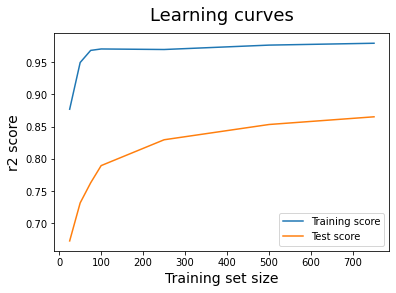

In [306]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500,750]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

In [301]:
model_xgb = XGBRegressor(objective='reg:squarederror', 
                      max_depth=4, 
                      n_estimators=40, #first param
                      learning_rate=0.1)   #second param

In [302]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=40, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [303]:
y_pred_=model_xgb.predict(X_test)

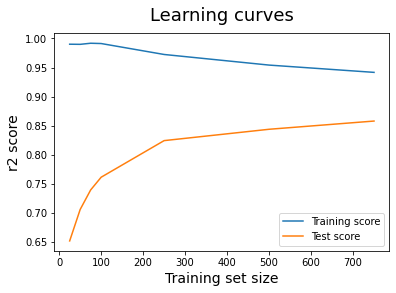

In [305]:
train_sizes = [25,50,75,100,250,500,750]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model_xgb, X=X_train, y=y_train, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

In [353]:
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import FunctionTransformer
from copy import copy
new_model=make_pipeline(
    make_union(
        FunctionTransformer(copy),
        FunctionTransformer(copy)
    ),
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.35000000000000003, min_samples_leaf=1, min_samples_split=13, n_estimators=100)),
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.85, learning_rate=0.01, loss="lad", max_depth=4, max_features=0.9000000000000001, min_samples_leaf=8, min_samples_split=9, n_estimators=100, subsample=0.05)),
    RandomForestRegressor(bootstrap=True, max_features=0.25, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
)

In [354]:
new_model.fit(X_train,y_train)

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x109269310>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x109269310>))])),
                ('stackingestimator-1',
                 StackingEstimator(estimator=ExtraTreesRegressor(max_features=0.35000000000000003,
                                                                 min_samples_split=13))),
                ('stackingestimator-2',
                 StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.85,
                                                                       learning_rate=0.01,
                                                                       loss='lad',
                                                                       max_depth=4,
                                                                       max_features=0.9000000000000001,
                                                                       min_samples_leaf=8,
                                                                       min_samples_split=9,
                                                                       subsample=0.05))),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=0.25, min_samples_leaf=2))])

In [355]:
y_pred_=new_model.predict(X_test)

In [356]:
mse = mean_squared_error(y_test, y_pred)

rmse = math.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)

rsquared = r2_score(y_test, y_pred)

#max_error = max_error(y_test, y_pred)

print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
#print('Max Error =', round(max_error, 2))

MSE = 1217349.43
RMSE = 1103.34
MAE = 820.46
R2 = 0.89


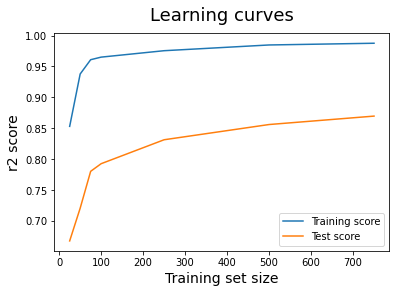

In [358]:
train_sizes = [25,50,75,100,250,500,750]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=new_model, X=X_train, y=y_train, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()